# Asthma and Pollution Exploratory Data Analysis
Ainsley Atherton, Nikki La, Jordan Ledbetter, Palaniappan Vijay Sithambaram


In [1]:
#Packages
import pandas as pd

## Datasets

In [2]:
#Read in the data

#Asthma
folder_path = 'CDC_Asthma_Data'
asthma_prev = pd.read_csv(folder_path + '/Adult_Asthma_prev2018-2021/data_180748.csv')
asthma_hosp = pd.read_csv(folder_path + '/Asthma_Hospitalizations2000-2021/data_181454.csv')
asthma_er = pd.read_csv(folder_path + '/ER_visits_Asthma2000-2021/data_181211.csv')


In [3]:
#EPA Data (will probably want to merge these into one dataset)
AQI_folder_path = 'CDC_Asthma_Data/AQI_data'
AQI2000 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2000.csv')
AQI2001 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2001.csv')
AQI2002 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2002.csv')
AQI2003 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2003.csv')
AQI2004 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2004.csv')
AQI2005 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2005.csv')
AQI2006 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2006.csv')
AQI2007 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2007.csv')
AQI2008 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2008.csv')
AQI2009 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2009.csv')
AQI2010 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2010.csv')
AQI2011 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2011.csv')
AQI2012 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2012.csv')
AQI2013 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2013.csv')
AQI2014 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2014.csv')
AQI2015 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2015.csv')
AQI2016 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2016.csv')
AQI2017 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2017.csv')
AQI2018 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2018.csv')
AQI2019 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2019.csv')
AQI2020 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2020.csv')
AQI2021 = pd.read_csv(AQI_folder_path + '/annual_aqi_by_county_2021.csv')

### Asthma Prevalence

In [4]:
asthma_prev.shape
print(asthma_prev.head())

   StateFIPS    State  CountyFIPS   County  Year  Value  Data Comment  \
0          1  Alabama        1001  Autauga  2018   10.2           NaN   
1          1  Alabama        1001  Autauga  2019    9.7           NaN   
2          1  Alabama        1001  Autauga  2020    9.8           NaN   
3          1  Alabama        1001  Autauga  2021   10.2           NaN   
4          1  Alabama        1003  Baldwin  2018    9.6           NaN   

  95% Confidence Interval  Confidence Interval Low  Confidence Interval High  \
0            (9.6 - 10.8)                      9.6                      10.8   
1            (9.2 - 10.3)                      9.2                      10.3   
2            (9.4 - 10.4)                      9.4                      10.4   
3            (8.9 - 11.6)                      8.9                      11.6   
4            (9.1 - 10.2)                      9.1                      10.2   

   Unnamed: 10  
0          NaN  
1          NaN  
2          NaN  
3          N

No null values in columns we want to keep:

In [5]:
asthma_prev.rename(columns = {'Value':'Prevalence %'}, inplace = True) 
asthma_prev.isnull().sum()

StateFIPS                       0
State                           0
CountyFIPS                      0
County                          0
Year                            0
Prevalence %                    0
Data Comment                12482
95% Confidence Interval         0
Confidence Interval Low         0
Confidence Interval High        0
Unnamed: 10                 12482
dtype: int64

Removing data comment and unnamed columns as we don't need them

In [6]:
asthma_prev = asthma_prev.drop(['Data Comment'], axis=1)
asthma_prev = asthma_prev.drop(['Unnamed: 10'], axis=1)
asthma_prev = asthma_prev.drop(['95% Confidence Interval', 'Confidence Interval Low', 'Confidence Interval High'], axis=1)
asthma_prev

,StateFIPS,State,CountyFIPS,County,Year,Prevalence %
0,1,Alabama,1001,Autauga,2018,10.2
1,1,Alabama,1001,Autauga,2019,9.7
2,1,Alabama,1001,Autauga,2020,9.8
3,1,Alabama,1001,Autauga,2021,10.2
4,1,Alabama,1003,Baldwin,2018,9.6
...,...,...,...,...,...,...
12477,56,Wyoming,56043,Washakie,2021,9.6
12478,56,Wyoming,56045,Weston,2018,9.3
12479,56,Wyoming,56045,Weston,2019,9.0
12480,56,Wyoming,56045,Weston,2020,9.8


Looks good now, ready for merging

### Hospitalizations due to Asthma
- Age adjusted rate of hospitalization for asthma per 10,000

In [7]:
print(asthma_hosp.head())
df = asthma_hosp.sort_values(by = 'Year', ascending = True)
df

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005   7.2          NaN         NaN
1          4  Arizona        4001  Apache  2006   4.8          NaN         NaN
2          4  Arizona        4001  Apache  2007   3.6          NaN         NaN
3          4  Arizona        4001  Apache  2008   5.1          NaN         NaN
4          4  Arizona        4001  Apache  2009   5.6          NaN         NaN


,StateFIPS,State,CountyFIPS,County,Year,Value,Data Comment,Unnamed: 7
20101,35,New Mexico,35013,Dona Ana,2000,6.1,NaN,NaN
22114,37,North Carolina,37015,Bertie,2000,22.9,NaN,NaN
22103,37,North Carolina,37013,Beaufort,2000,22.7,NaN,NaN
3537,12,Florida,12081,Manatee,2000,11.7,NaN,NaN
22092,37,North Carolina,37011,Avery,2000,12.1,NaN,NaN
...,...,...,...,...,...,...,...,...
20232,35,New Mexico,35023,Hidalgo,2021,0.0,NaN,NaN
20254,35,New Mexico,35025,Lea,2021,3.2,NaN,NaN
20276,35,New Mexico,35027,Lincoln,2021,Suppressed,Unstable,NaN
20166,35,New Mexico,35017,Grant,2021,Suppressed,Unstable,NaN


In [8]:
asthma_hosp.rename(columns = {'Value':'Hospitalizations (rate per 10,000)'}, inplace = True) 
asthma_hosp.isnull().sum()

StateFIPS                                 0
State                                     0
CountyFIPS                                0
County                                    0
Year                                      0
Hospitalizations (rate per 10,000)        0
Data Comment                          23115
Unnamed: 7                            33478
dtype: int64

In [9]:
asthma_hosp = asthma_hosp.drop(['Data Comment'], axis=1)
asthma_hosp = asthma_hosp.drop(['Unnamed: 7'], axis=1)
asthma_hosp

,StateFIPS,State,CountyFIPS,County,Year,"Hospitalizations (rate per 10,000)"
0,4,Arizona,4001,Apache,2005,7.2
1,4,Arizona,4001,Apache,2006,4.8
2,4,Arizona,4001,Apache,2007,3.6
3,4,Arizona,4001,Apache,2008,5.1
4,4,Arizona,4001,Apache,2009,5.6
...,...,...,...,...,...,...
33473,55,Wisconsin,55141,Wood,2017,3.7
33474,55,Wisconsin,55141,Wood,2018,2.6
33475,55,Wisconsin,55141,Wood,2019,2.7
33476,55,Wisconsin,55141,Wood,2020,Suppressed


### ER visits due to Asthma

In [10]:
print(asthma_er.head())

   StateFIPS    State  CountyFIPS  County  Year Value Data Comment  Unnamed: 7
0          4  Arizona        4001  Apache  2005  31.0          NaN         NaN
1          4  Arizona        4001  Apache  2006  21.1          NaN         NaN
2          4  Arizona        4001  Apache  2007  21.1          NaN         NaN
3          4  Arizona        4001  Apache  2008  20.2          NaN         NaN
4          4  Arizona        4001  Apache  2009  44.0          NaN         NaN


In [11]:
asthma_er.rename(columns = {'Value':'ER visits for Asthma (rate per 10,000)'}, inplace = True) 
asthma_er.isnull().sum()

StateFIPS                                     0
State                                         0
CountyFIPS                                    0
County                                        0
Year                                          0
ER visits for Asthma (rate per 10,000)        0
Data Comment                              20193
Unnamed: 7                                22059
dtype: int64

In [12]:
asthma_er = asthma_er.drop(['Unnamed: 7', 'Data Comment'], axis=1)

### Merging Asthma Data -->  All Asthma Dataset

In [13]:
prev_hosp_merge = asthma_hosp.merge(asthma_prev, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer', indicator=True)
prev_hosp_merge

,StateFIPS,State,CountyFIPS,County,Year,"Hospitalizations (rate per 10,000)",Prevalence %,_merge
0,4,Arizona,4001,Apache,2005,7.2,NaN,left_only
1,4,Arizona,4001,Apache,2006,4.8,NaN,left_only
2,4,Arizona,4001,Apache,2007,3.6,NaN,left_only
3,4,Arizona,4001,Apache,2008,5.1,NaN,left_only
4,4,Arizona,4001,Apache,2009,5.6,NaN,left_only
...,...,...,...,...,...,...,...,...
41096,56,Wyoming,56043,Washakie,2021,NaN,9.6,right_only
41097,56,Wyoming,56045,Weston,2018,NaN,9.3,right_only
41098,56,Wyoming,56045,Weston,2019,NaN,9.0,right_only
41099,56,Wyoming,56045,Weston,2020,NaN,9.8,right_only


In [14]:
#Merging in ER visits
all_asthma = prev_hosp_merge.merge(asthma_er, on=['StateFIPS','State', 'CountyFIPS', 'County', 'Year'], how='outer')
all_asthma


,StateFIPS,State,CountyFIPS,County,Year,"Hospitalizations (rate per 10,000)",Prevalence %,_merge,"ER visits for Asthma (rate per 10,000)"
0,4,Arizona,4001,Apache,2005,7.2,NaN,left_only,31.0
1,4,Arizona,4001,Apache,2006,4.8,NaN,left_only,21.1
2,4,Arizona,4001,Apache,2007,3.6,NaN,left_only,21.1
3,4,Arizona,4001,Apache,2008,5.1,NaN,left_only,20.2
4,4,Arizona,4001,Apache,2009,5.6,NaN,left_only,44.0
...,...,...,...,...,...,...,...,...,...
41796,37,North Carolina,37199,Yancey,2013,NaN,NaN,NaN,23.7
41797,37,North Carolina,37199,Yancey,2014,NaN,NaN,NaN,44.0
41798,37,North Carolina,37199,Yancey,2015,NaN,NaN,NaN,38.0
41799,37,North Carolina,37199,Yancey,2016,NaN,NaN,NaN,34.2


In [15]:
all_asthma.shape

(41801, 9)

In [16]:
all_asthma['CountyFIPS'] = all_asthma['CountyFIPS'].astype(str).str.zfill(5)


In [17]:
all_asthma

,StateFIPS,State,CountyFIPS,County,Year,"Hospitalizations (rate per 10,000)",Prevalence %,_merge,"ER visits for Asthma (rate per 10,000)"
0,4,Arizona,04001,Apache,2005,7.2,NaN,left_only,31.0
1,4,Arizona,04001,Apache,2006,4.8,NaN,left_only,21.1
2,4,Arizona,04001,Apache,2007,3.6,NaN,left_only,21.1
3,4,Arizona,04001,Apache,2008,5.1,NaN,left_only,20.2
4,4,Arizona,04001,Apache,2009,5.6,NaN,left_only,44.0
...,...,...,...,...,...,...,...,...,...
41796,37,North Carolina,37199,Yancey,2013,NaN,NaN,NaN,23.7
41797,37,North Carolina,37199,Yancey,2014,NaN,NaN,NaN,44.0
41798,37,North Carolina,37199,Yancey,2015,NaN,NaN,NaN,38.0
41799,37,North Carolina,37199,Yancey,2016,NaN,NaN,NaN,34.2


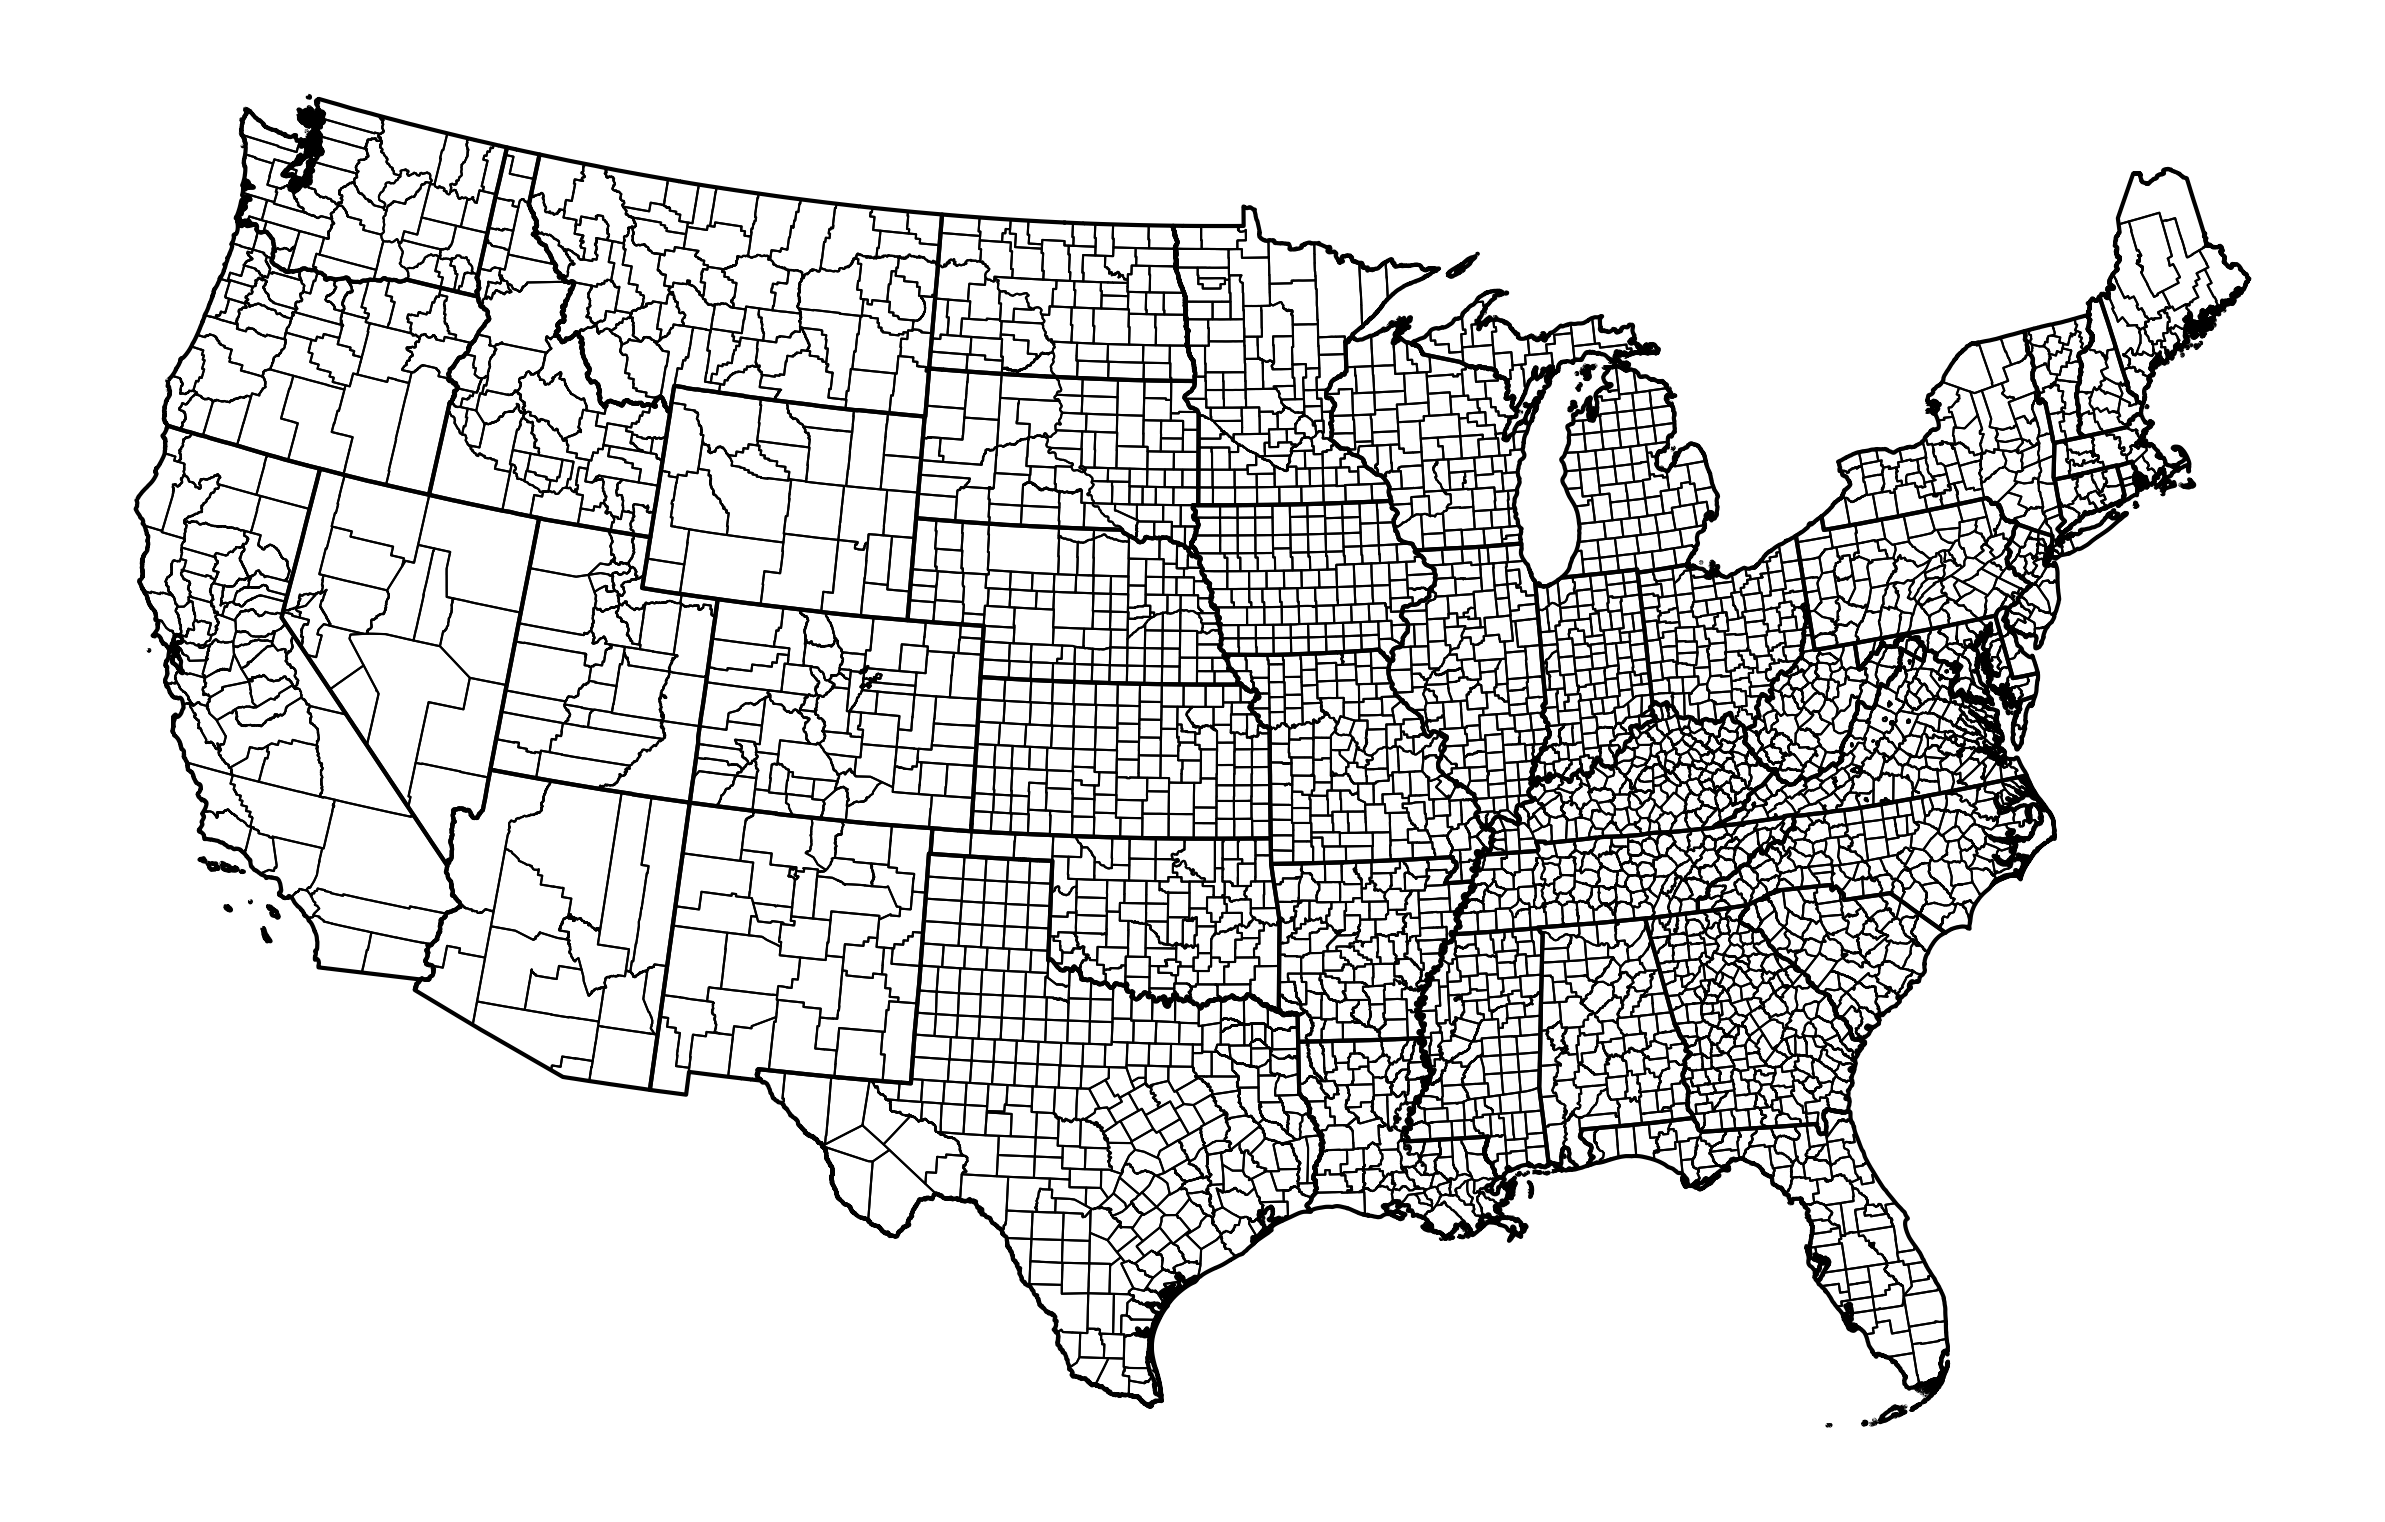

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Load data
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'

#Make dataframes
county_gdf = gpd.read_file(url_county)
state_gdf = gpd.read_file(url_state)

#Exluding states outside mainland
ex_list = [15, 72, 2, 60, 66, 69, 78]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(ex_list)]
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(ex_list)]

#Converting CRS
county_gdf = county_gdf.to_crs(5070)
state_gdf = state_gdf.to_crs(5070)

#Plot
fig, ax1 = plt.subplots(1, 1, figsize = (10, 8), dpi = 300)

county_gdf.plot(ax = ax1, linewidth = .5, edgecolor = 'black', facecolor = 'none')
state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()



In [29]:
all_asthma2018 = all_asthma[all_asthma['Year'] == 2018]

In [32]:
county_gdf.rename(columns = {'GEOID':'CountyFIPS'}, inplace = True) 

In [33]:
geo_pop = county_gdf.merge(all_asthma2018, on = 'CountyFIPS', how = 'left') 

In [34]:
geo_pop

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,CountyFIPS,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,...,AWATER,geometry,StateFIPS,State,County,Year,"Hospitalizations (rate per 10,000)",Prevalence %,_merge,"ER visits for Asthma (rate per 10,000)"
0,20,161,00485044,0500000US20161,20161,Riley,Riley County,KS,Kansas,06,...,32047392,"POLYGON ((-82124.738 1807458.230, -82132.336 1...",20.0,Kansas,Riley,2018.0,Suppressed,9.8,both,1.5
1,19,159,00465268,0500000US19159,19159,Ringgold,Ringgold County,IA,Iowa,06,...,8723135,"POLYGON ((127862.311 1979027.467, 127850.008 1...",19.0,Iowa,Ringgold,2018.0,0.0,8.8,both,28.8
2,30,009,01720111,0500000US30009,30009,Carbon,Carbon County,MT,Montana,06,...,35213028,"POLYGON ((-1080043.778 2542886.554, -1071425.2...",30.0,Montana,Carbon,2018.0,NaN,9.1,right_only,NaN
3,16,007,00395090,0500000US16007,16007,Bear Lake,Bear Lake County,ID,Idaho,06,...,191364281,"POLYGON ((-1269953.954 2279390.018, -1269561.5...",16.0,Idaho,Bear Lake,2018.0,NaN,9.6,right_only,NaN
4,55,011,01581065,0500000US55011,55011,Buffalo,Buffalo County,WI,Wisconsin,06,...,87549529,"POLYGON ((310980.660 2386653.979, 311029.751 2...",55.0,Wisconsin,Buffalo,2018.0,Suppressed,9.3,both,16.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,53,003,01533502,0500000US53003,53003,Asotin,Asotin County,WA,Washington,06,...,11291731,"POLYGON ((-1649096.511 2757565.423, -1644531.2...",53.0,Washington,Asotin,2018.0,Suppressed,10.8,both,NaN
3104,13,043,00342852,0500000US13043,13043,Candler,Candler County,GA,Georgia,06,...,15018189,"POLYGON ((1282504.903 1123868.469, 1282643.946...",13.0,Georgia,Candler,2018.0,NaN,10.8,right_only,NaN
3105,48,451,01384011,0500000US48451,48451,Tom Green,Tom Green County,TX,Texas,06,...,48077315,"POLYGON ((-497863.947 956184.834, -496234.612 ...",48.0,Texas,Tom Green,2018.0,NaN,8.7,right_only,NaN
3106,39,089,01074057,0500000US39089,39089,Licking,Licking County,OH,Ohio,06,...,12761090,"POLYGON ((1115778.594 1958759.194, 1115689.498...",39.0,Ohio,Licking,2018.0,NaN,9.5,right_only,NaN


<Axes: >

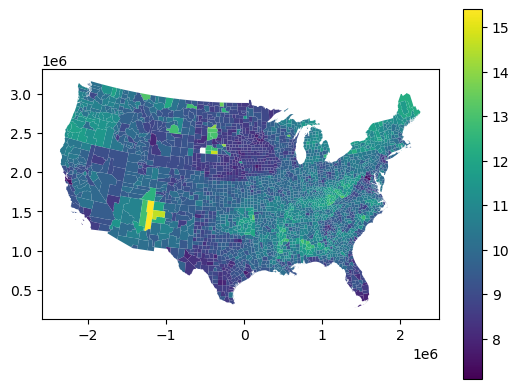

In [36]:
geo_pop.plot(column = 'Prevalence %', cmap = 'viridis', legend = True)

In [ ]:
gdf = pd.merge(all_asthma, county_gdf)
gdf

In [ ]:
all_asthma2018 = gdf[all_asthma['Year'] == 2018]
all_asthma2018

### Air Quality

In [ ]:
# Merge AQI data from 2000 - 2019
all_aqi_data = pd.concat([AQI2000, AQI2001, AQI2002, AQI2003, AQI2004, AQI2005, AQI2006, AQI2007, AQI2008, AQI2009, AQI2010,
                          AQI2011, AQI2012, AQI2013, AQI2014, AQI2015, AQI2016, AQI2017, AQI2018, AQI2019], ignore_index=True)

In [ ]:
# Find NaN values
nan_values = all_aqi_data.isna().sum()
print(nan_values)
print(all_aqi_data.shape)

In [ ]:
all_aqi_data
all_aqi_data = all_aqi_data.sort_values(by = ['County', 'Year'], ascending = True)
all_aqi_data

In [ ]:
nan_values = all_aqi_data.isna().sum()
print(nan_values)
